In [1]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.animation as animation
from IPython.display import Image

連結試算表，並取得所有資料

In [3]:
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('C:\\Users\\j8862\\OneDrive\\Desktop\\datascience\\googlesheet.json', scope)
gc = gspread.authorize(credentials)
# Open a worksheet from spreadsheet with one shot
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1FJPf9S2vpimDZvefrpnfq31cq3JpmySHse74WQoEgu4/edit?ts=5c8895e5#gid=618695640')
wks4 = sh.worksheet("復興南北路")
data = wks4.get_all_values()
times = range(3,99)
road = []
for i in range(3,10): 
    road.append(data[2][i])

設置折線圖基本參數(字體、顏色、XY軸標題)，定義回測函數update，用animation.FuncAnimation更新每張gif的折線圖數值

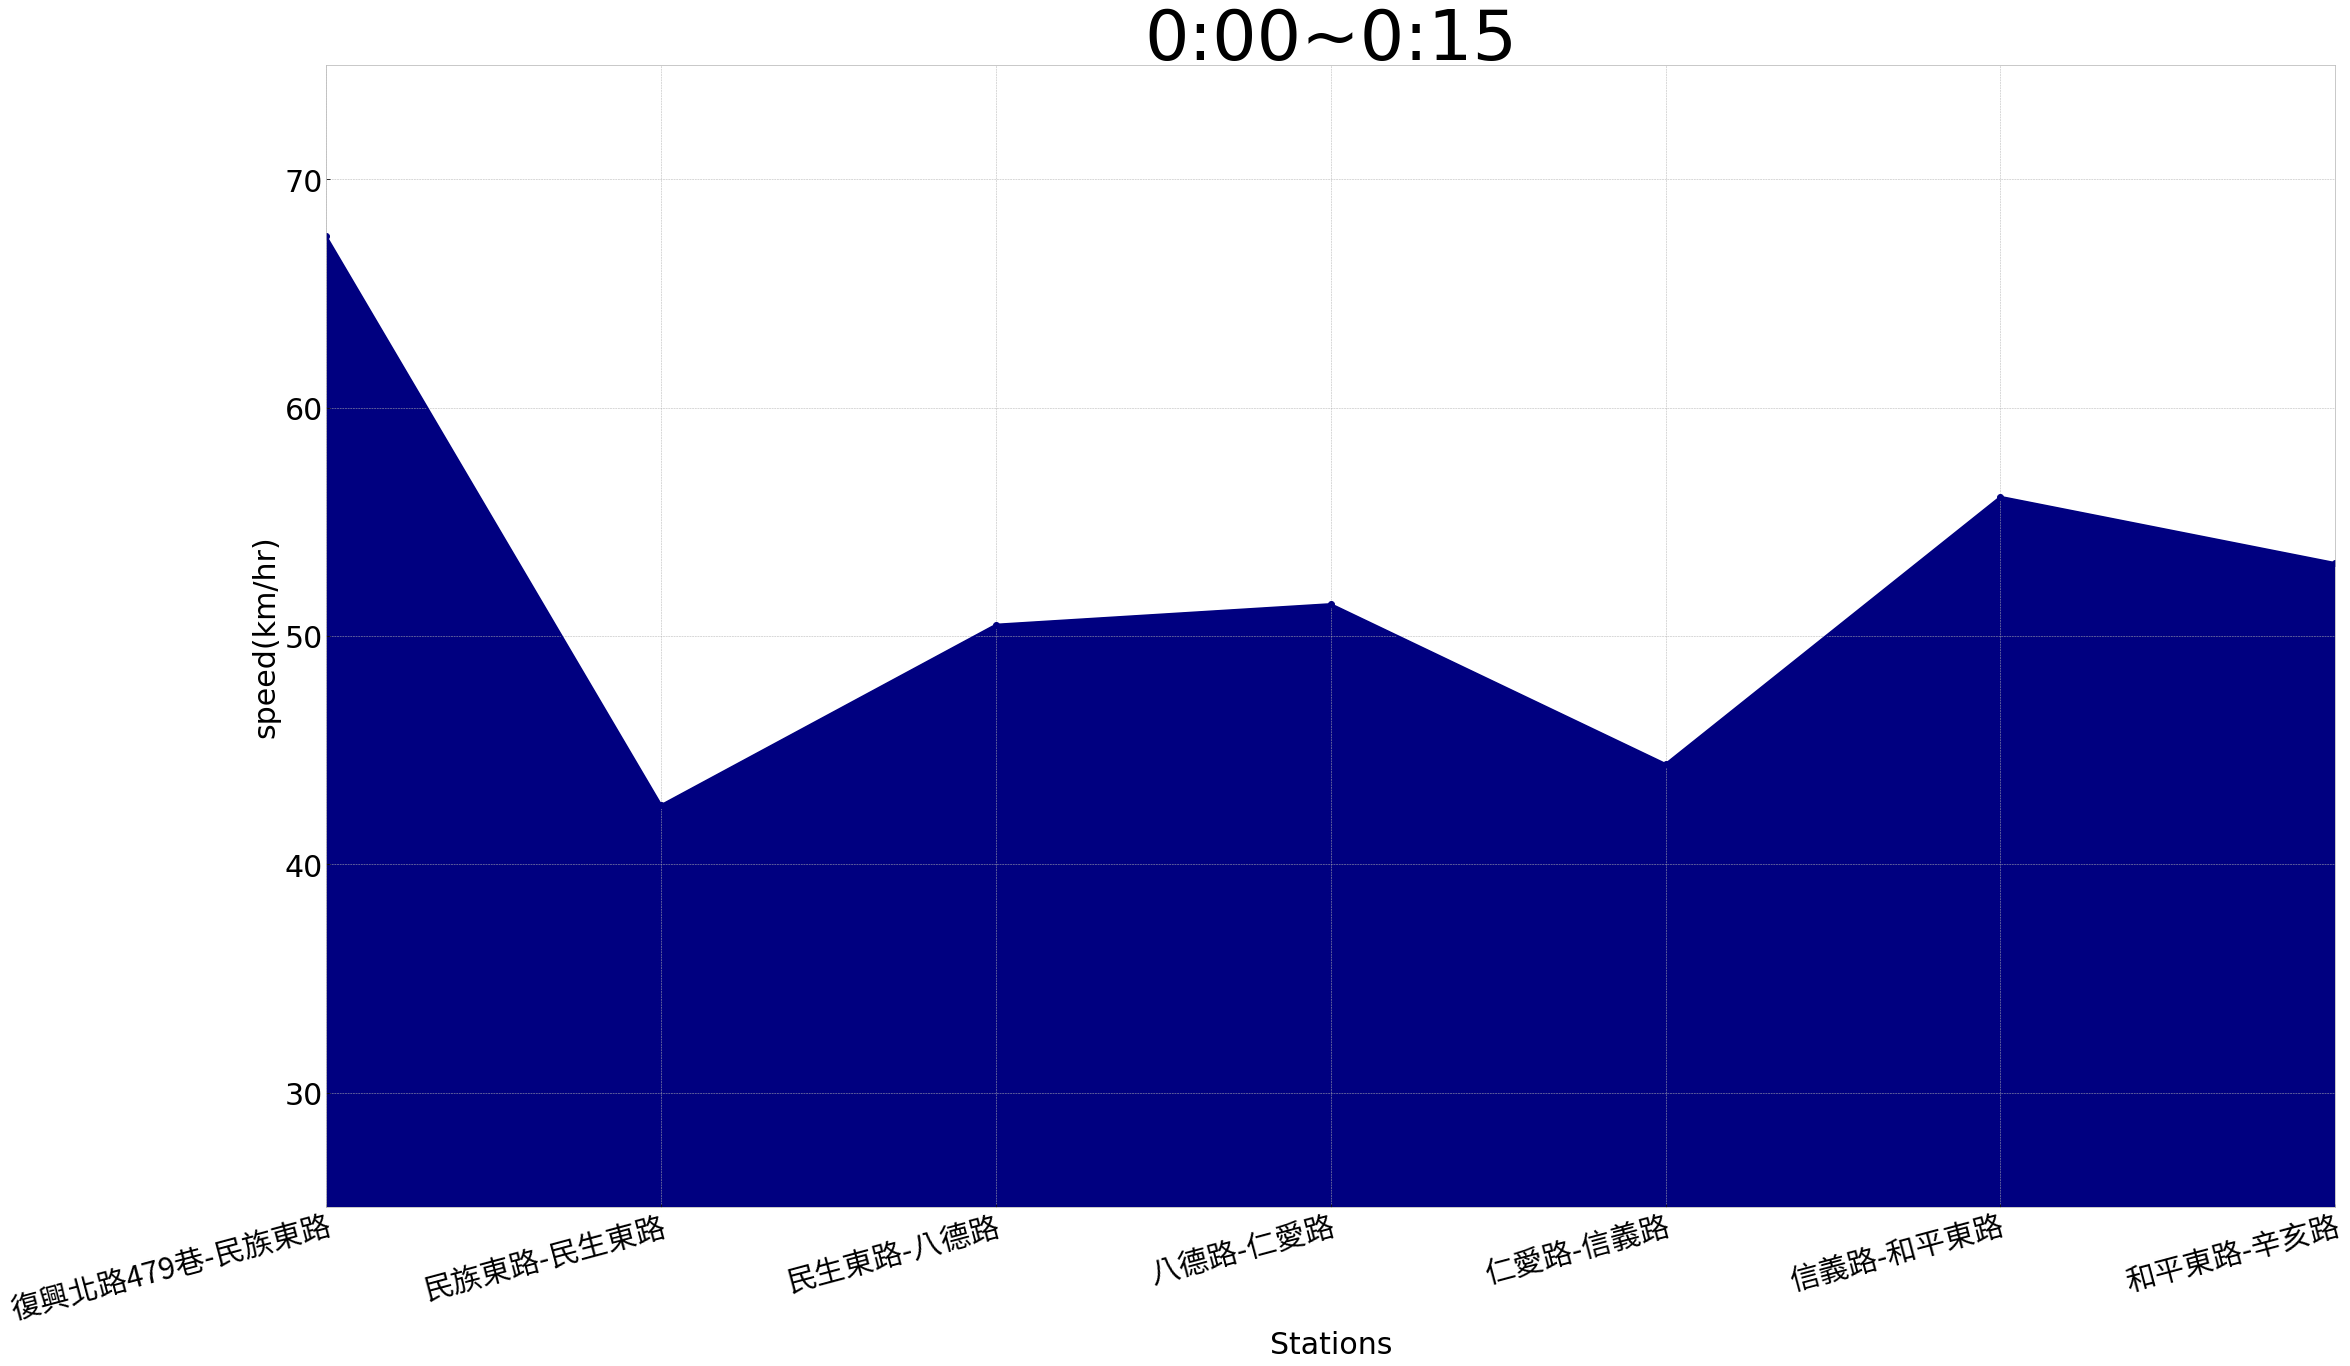

finish


In [10]:
fig, ax = plt.subplots(figsize=(36, 21)) 
ln, = plt.plot([],[], 'ro',animated=True,linestyle='solid',color='navy')  
plt.style.use('bmh')
fontPath = r'C:\\Users\\j8862\\OneDrive\\Desktop\\datascience\\NotoSansCJKtc-Regular.otf'
font30 = fm.FontProperties(fname=fontPath, size=30)
ax.set_ylim(25, 75)
ax.set_xlim(0,6)
ax.set_title("speed-station")
ax.set_ylabel("speed(km/hr)",size=30)
ax.set_xlabel("Stations",size=30)
ax.tick_params(axis='y', labelsize=30)
ax.set_xticklabels(road,fontproperties=font30,rotation=15,ha="right",rotation_mode="anchor")

def update(j):
    ax.set_title(data[j][2],size=70)
    xdata = range(0,7)
    ydata = []
    ax.fill_between(range(0,7),[80,80,80,80,80,80,80],color='white')
    for i in range(3,10):
        ydata.append(eval(data[j][i]))
    ln.set_data(xdata, ydata)
    ax.fill_between(xdata,ydata,color='navy')
    return ln,

ani = animation.FuncAnimation(fig, update,times, interval=0.1,repeat=False,blit=True) 
plt.show()
ani.save('復興往南.gif',writer='imagemagick')
print('finish')

![復興南北路平日速路gif](https://github.com/j88620714/DataScience/blob/master/HW1/%E5%BE%A9%E8%88%88%E5%BE%80%E5%8D%97.gif)
